In [1]:
import sys 
sys.path.append('../')
import torch 
import matplotlib.pyplot as plt
from utils import * 
from mlmm import *
from dataset import reference_test, load_dataset_1d

In [2]:
l = 8 # number of level, total number of points is 2^l-1
k = 3 # number of corase level
m = 7 # local range for correction
order = 4 # order of interpolation/restriction

In [3]:
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')

In [4]:
task_nm = 'lnabs'
upath = '/workdir/MLFormer/data/kernel_estimation/grf1d_N2000_s8193_m0_gamma1_tau1_sigma1_dirichlet.mat'
wpath = f'/workdir/MLFormer/data/kernel_estimation/{task_nm}_8193.npy'
train_loader, test_loader, Khh, xh, h = load_dataset_1d(task_nm, upath, wpath, bsz=20)

In [5]:
train_loader, test_loader, Khh, xh, h = load_dataset_1d(task_nm, upath, wpath, bsz=20)
uh, wh_numeric = train_loader.dataset[1]
uh = uh[None]
wh_numeric = multi_summation(Khh, uh, h)

In [6]:
wh_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k=k, m=m)
print('l1 : ', l1_norm((wh_ml[-1]), wh_numeric))
print('rl2 : ', rl2_error((wh_ml[-1]), wh_numeric))
wh_ml = SingularSmoothKernelMLMM(KHH, uh, Khh_banddiff_lst, idx_j_lst, h, k=k)
print('l1 : ', l1_norm((wh_ml[-1]), wh_numeric))
print('rl2 : ', rl2_error((wh_ml[-1]), wh_numeric))

l1 :  tensor(1.6028e-05)
rl2 :  tensor(0.0001)
l1 :  tensor(1.6028e-05)
rl2 :  tensor(0.0001)


In [27]:
print('l1 : ', l1_norm((wh_ml[-1]), wh_numeric))
print('rl2 : ', rl2_error((wh_ml[-1]), wh_numeric))

l1 :  tensor(1.6028e-05)
rl2 :  tensor(0.0001)


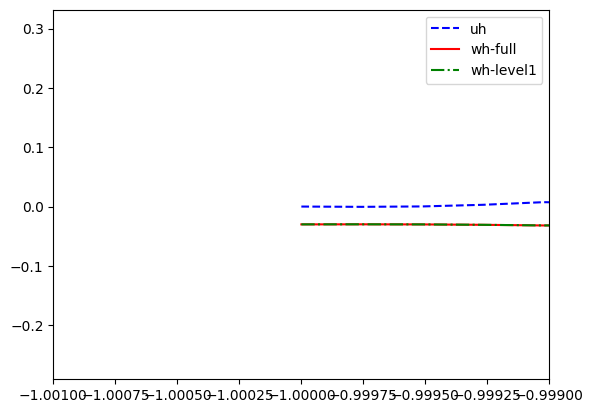

In [14]:
# plt.plot(xh_ml[0][0,0], wh_ml[0][0,0], '-b', label='level-0')
# plt.plot(xh_ml[-1][0,0], wh_ml[-1][0,0], '-.y', label='level-1')

plt.plot(xh[0,0], uh[0,0], '--b', label='uh')
plt.plot(xh[0,0], wh_numeric[0,0], '-r', label='wh-full')
plt.plot(xh[0,0], wh_ml[-1][0,0], '-.g', label=f'wh-level{k}')
plt.xlim([-1.001, -0.999])
plt.legend()